# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the *synth1* data into python using the *loadmat* function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided *clusterPlot()* function.
 + *In Python, you can use the function k_means() from the package sklearn.cluster to compute *k*-means clustering.*
 + *Type clusterPlot(X,clusters,centroids,y) to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


In [1]:
# Imports
import numpy as np
import scipy.io as sio
import scipy.cluster.hierarchy as sch
import sklearn.cluster as skc
import matplotlib.pyplot as plt

from Toolbox.clusterPlot import clusterPlot
from Toolbox.clusterVal  import clusterVal

In [2]:
def plotSynth(n):
    # Load synth data
    synth_data = sio.loadmat('Data/synth' + str(n) + '.mat')
    X = synth_data['X']
    y = synth_data['y']

    # Cluster synth data
    kmeans    = skc.KMeans(n_clusters=4).fit(X)
    clusters  = kmeans.predict(X)
    centroids = kmeans.cluster_centers_

    # Plot synth data
    plt.subplot(220 + n)
    plt.title  ('4-means clustering of the synth' + str(n) + ' data.')
    plt.xlabel ('x')
    plt.ylabel ('y')
    clusterPlot(X, clusters, centroids, y)

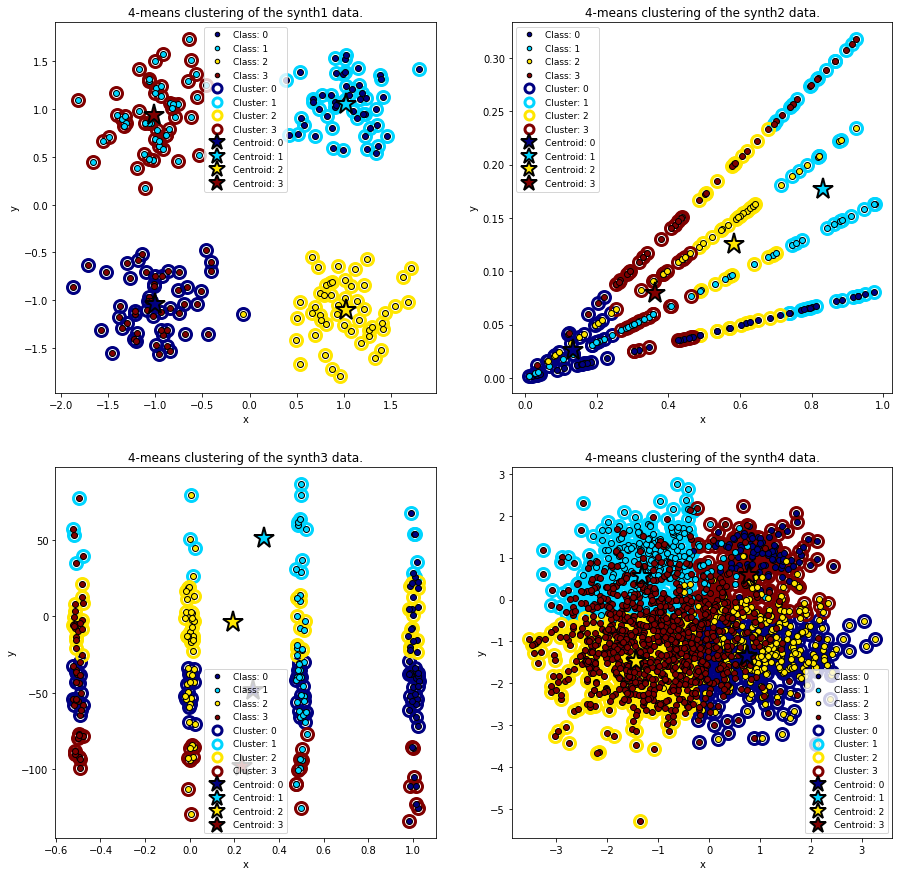

In [3]:
# Plot synth1 untill synth4.
plt.figure(1, figsize=(15,15))
for n in range(1,5):
    plotSynth(n)

> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

Synth2: The clustering does not coincide with the true classes, the clustering should be following the diagonal lines, like the true classes. But instead it is clustered in vertical sections. <br>
Synth3: The clustering does not coincide with the true classes, the clustering should be following the vertical lines, like the true classes. But instead it is clustered in horizontal sections. <br>
Synth4: In this plot it is kind of hard to see if the clusters and true classes coincide because everyting is so close to each other. It looks like sometimes they do coincide, like in the bottom left with 'Class: 3' and 'Cluster: 3'. But to the right of the plot, the clusters and true classes overlap a bit causing them to not coincide as much.

Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

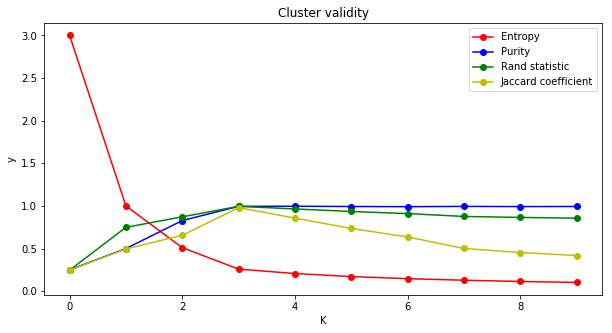

In [4]:
# Load synth1 data
synth1_data = sio.loadmat('Data/synth1.mat')
X = synth1_data['X']
y = synth1_data['y']

# Initialise array
measures = [[],[],[],[]]

for k in range(1,11):
    # Cluster1 synth data
    kmeans    = skc.KMeans(n_clusters=k).fit(X)
    clusters  = kmeans.predict(X)
    centroids = kmeans.cluster_centers_

    # Compute cluster validity
    entropy, purity, rand, jaccard = clusterVal(y, clusters)

    # Append cluster validity
    measures[0].append(entropy)
    measures[1].append(purity)
    measures[2].append(rand)
    measures[3].append(jaccard)

# Plot cluster validities
plt.figure(figsize=(10,5))
plt.title ('Cluster validity')
plt.xlabel('K')
plt.ylabel('y')
plt.plot(measures[0], 'ro-', label='Entropy')
plt.plot(measures[1], 'bo-', label='Purity')
plt.plot(measures[2], 'go-', label='Rand statistic')
plt.plot(measures[3], 'yo-', label='Jaccard coefficient')
plt.legend()
plt.show()

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

By applying the clusiter validity measures we can find out if it is worth it to add more clusters, or if it is better to stop adding clusters. This way we can find the optimal number of clusters for our data. <br>
When we use more than four clusters clusters to model the data; the purity and rand statistic will start slowly going down again. The Jaccard coefficient will start going down again quite rapidly. Also the entropy barely changes any more.

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command imshow(np.reshape(X[k,:],(c,x,y)).T) which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


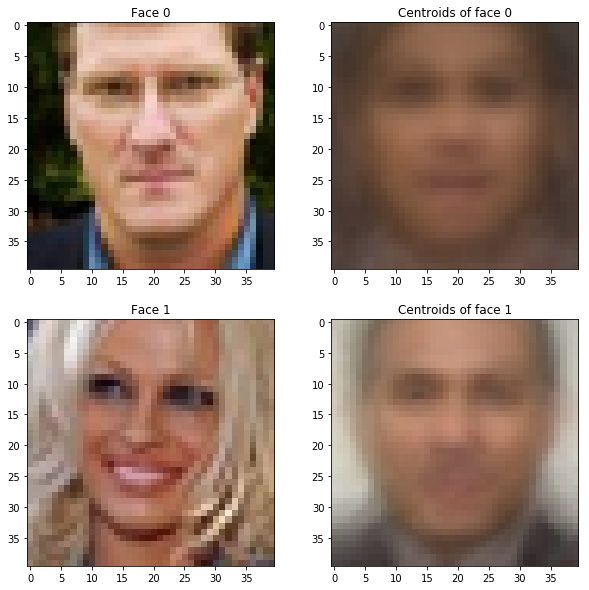

In [5]:
# Load wildfaces data
faces_data = sio.loadmat('Data/wildfaces.mat')
X = faces_data['X']

# Cluster wildfaces data
kmeans    = skc.KMeans(n_clusters=10).fit(X)
clusters  = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Plot wildfaces data
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,10))
ax1.imshow(np.reshape(X[0,:],        (3,40,40)).T)
ax2.imshow(np.reshape(centroids[0,:],(3,40,40)).T)
ax3.imshow(np.reshape(X[1,:],        (3,40,40)).T)
ax4.imshow(np.reshape(centroids[1,:],(3,40,40)).T)

ax1.set_title('Face 0')
ax2.set_title('Centroids of face 0')
ax3.set_title('Face 1')
ax4.set_title('Centroids of face 1')
plt.show()

> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

When increasing or decreasing the number of clusters the number of different colors changes. For instance; when the amount of clusters is set to two, the image will be shown with only two colors. More clusters means more colors, so a higher accuracy, but also less image compression.

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter cmap=cm.binary to the function imshow().

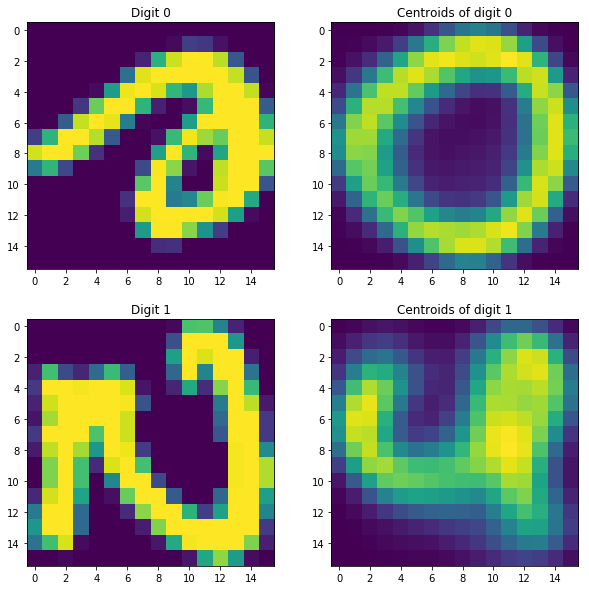

In [6]:
# Load digits data
faces_data = sio.loadmat('Data/digits.mat')
X = faces_data['X']

# Cluster digits data
kmeans    = skc.KMeans(n_clusters=10).fit(X)
clusters  = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Plot digits data
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,10))
ax1.imshow(np.reshape(X[0,:],        (16,16)).T)
ax2.imshow(np.reshape(centroids[0,:],(16,16)).T)
ax3.imshow(np.reshape(X[1,:],        (16,16)).T)
ax4.imshow(np.reshape(centroids[1,:],(16,16)).T)

ax1.set_title('Digit 0')
ax2.set_title('Centroids of digit 0')
ax3.set_title('Digit 1')
ax4.set_title('Centroids of digit 1')
plt.show()

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

Because if a number occurs a lot more than the other numbers, more clusters will be needed, this is because that one number that occurs a lot more will 'unbalance' the clusters. The digits one and seven seem to be confused the most. I think this is partially because they simply look quite similar, but also because there are a a few different ways to write both one and seven (Like the 'corner' at the top of the one, the 'stand' at the bottom of the one, and the 'cross' through the seven). 

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package *scipy.cluster.hierarchy*. The function *linkage()* forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function *fcluster* extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function *linkage()* computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type *Z = linkage(X, method='single', metric='euclidean')* to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function*fcluster()*. For example, type *cls = fcluster(Z, criterion='maxclust', t=4)* to get a maximum of 4 clusters. Type *help(fcluster)* (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

In [7]:
def dendogram(Z, num, method):
    # Plot Z dendogram
    plt.subplot(121)
    plt.title ('Hierarchical Clustering Dendrogram of synth' + str(num) + ' using ' + method)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    sch.dendrogram(Z)

def scatterplot(Z, num, method):
    # Plot Z scatter plot
    plt.subplot(122)
    plt.title ('Scatter plot of Z of synth' + str(num) + ' using ' + method)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(Z[:,0], Z[:,1], s=15, c='blue')
    plt.scatter(Z[:,2], Z[:,3], s=15, c='red')

def hierarchicalClustering(num, method):
    # Load synth data
    synth_data = sio.loadmat('Data/synth' + str(num) + '.mat')
    X = synth_data['X']

    # Compute synth linkage and fcluster
    Z   = sch.linkage(X, method, 'euclidean')
    cls = sch.fcluster(Z, criterion='maxclust', t=4)

    # Plot synth dendogram and scatter plot
    plt.figure(figsize=(15,6))
    dendogram  (Z, num, method)
    scatterplot(Z, num, method)
    plt.show()

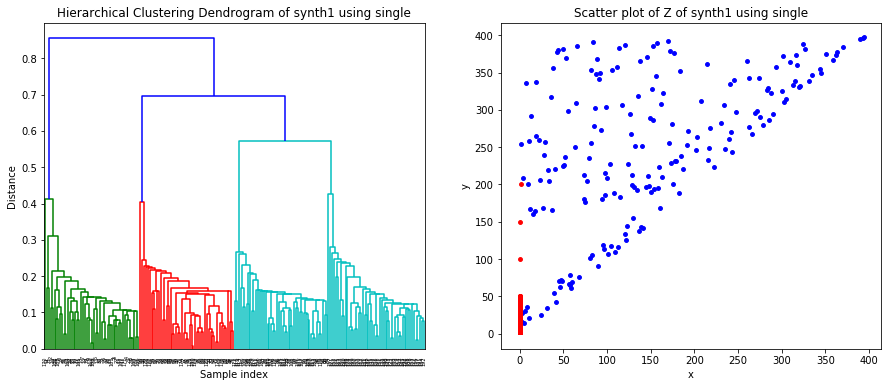

In [8]:
hierarchicalClustering(1, 'single')

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

When using the complete method the hierarchical clustering dendogram becomes a lot more balanced towards the middle. But the depth does het a lot higher than when using the single method. When using the average method the hierarchical clustering dendogram is also more balanced towards the middle than when using the single method, but not as centered as when using the complete method. Though when using the average method de depth is a lot lower than when using the complete method, but it is still a lot higher than when using the single method.

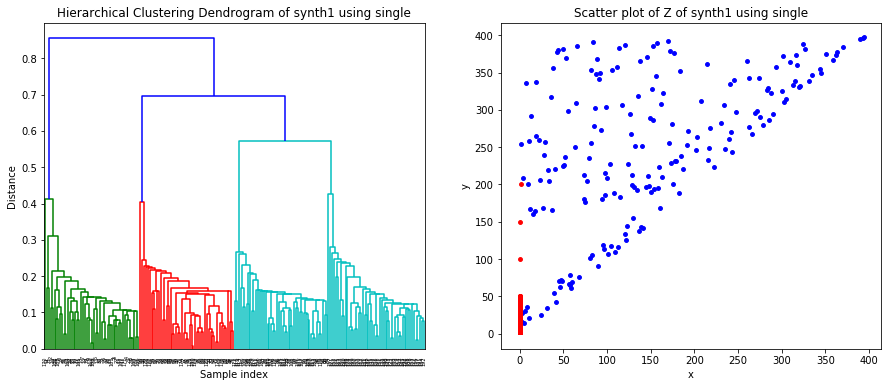

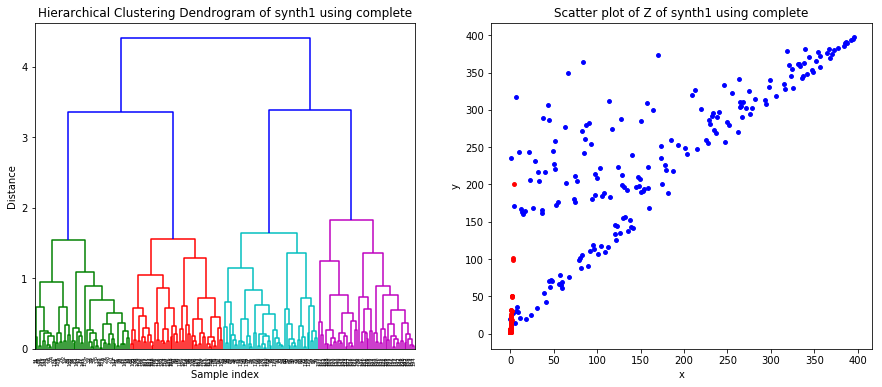

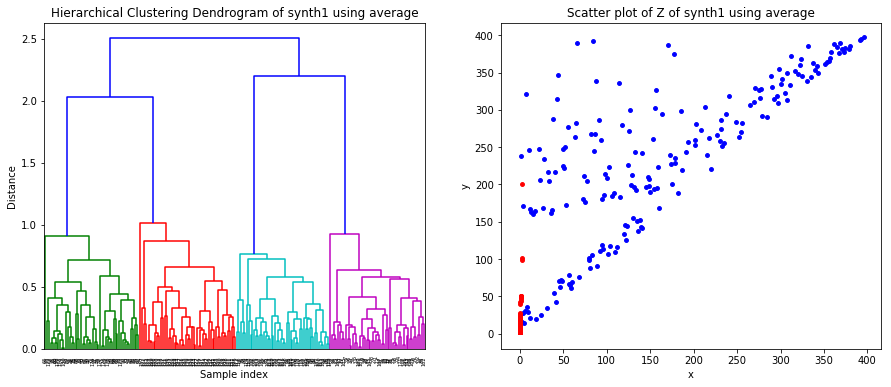

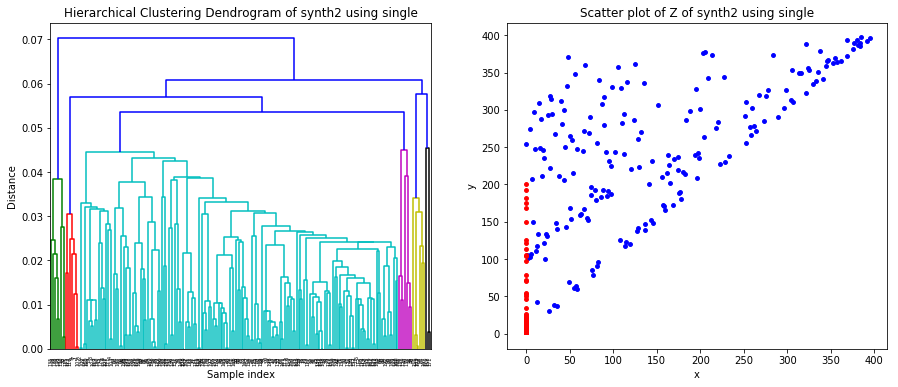

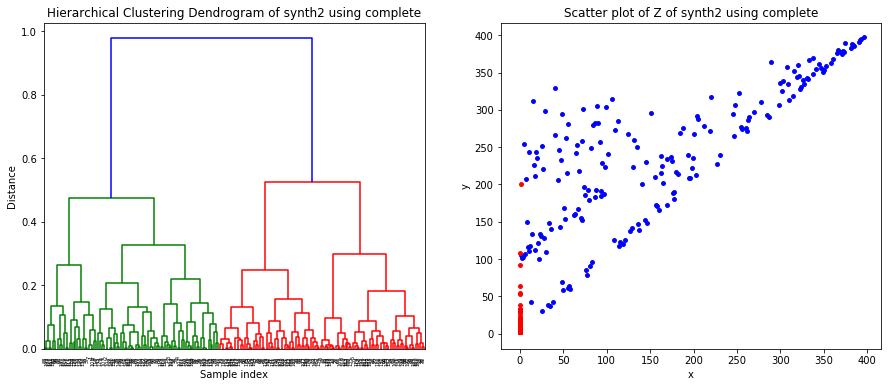

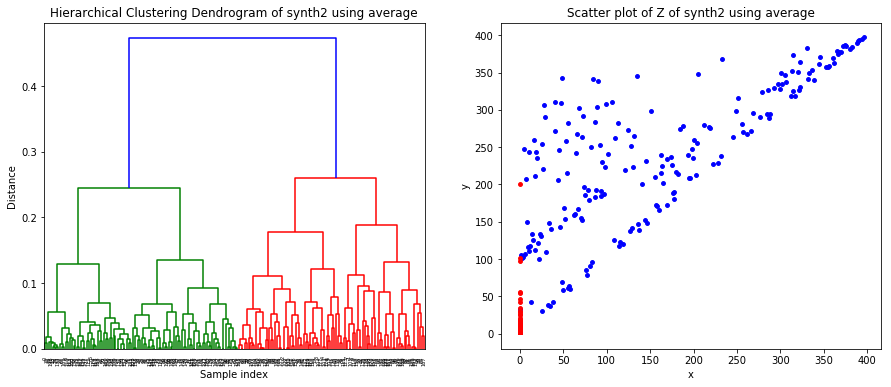

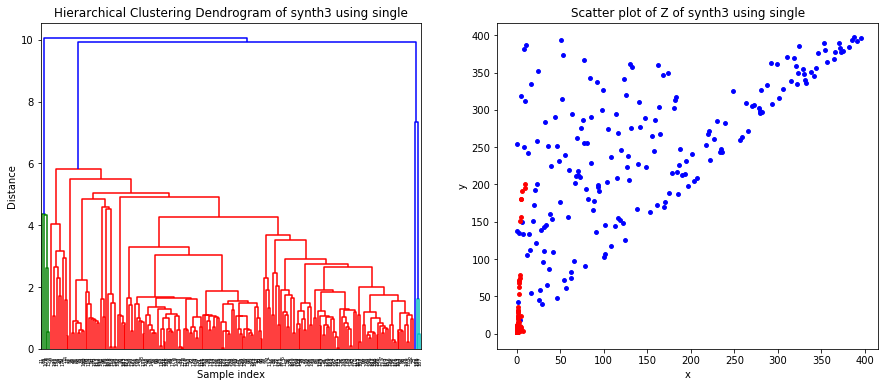

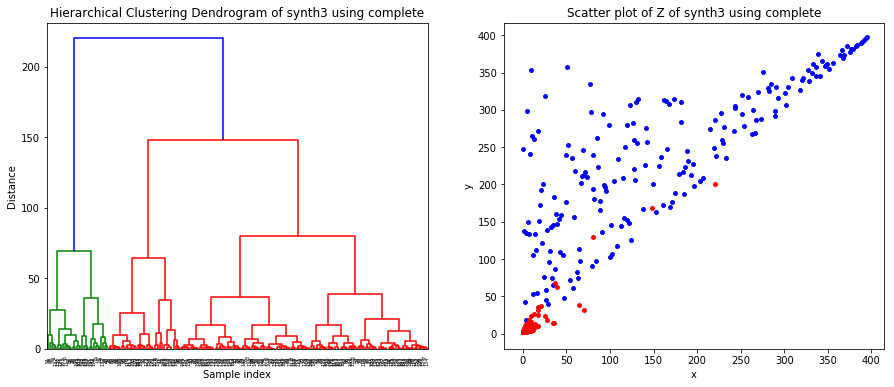

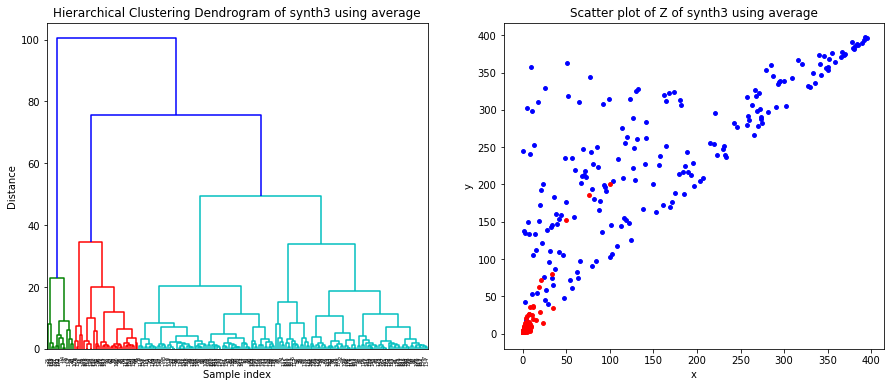

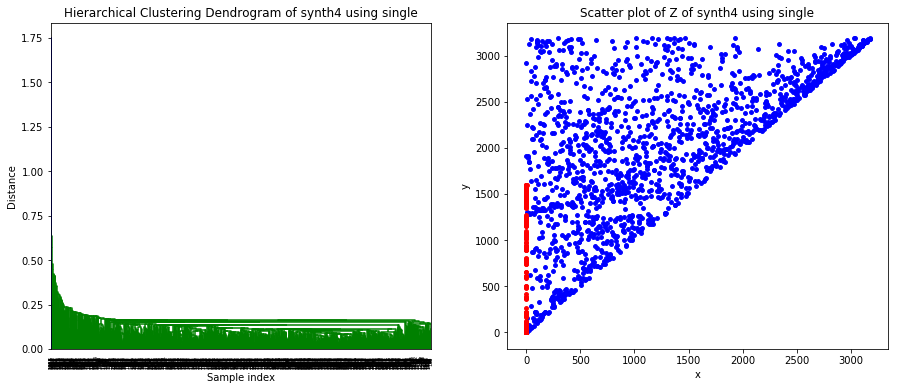

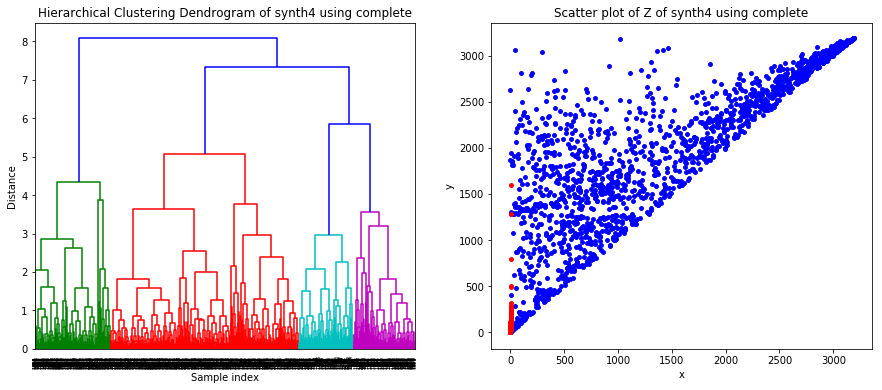

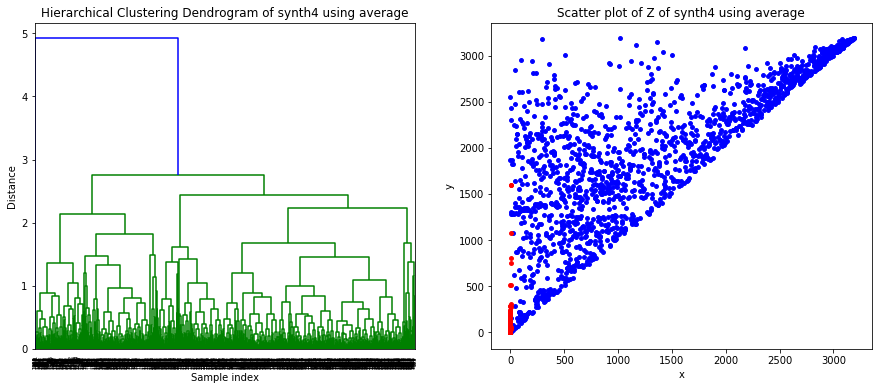

In [9]:
for n in range(1,5):
    # Single method
    hierarchicalClustering(n, 'single')
    # Complete method
    hierarchicalClustering(n, 'complete')
    # Average method
    hierarchicalClustering(n, 'average')